In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T16:12:14.424290+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.48798394203186035}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003980398178100586}
!!! {"init_...": 0.0006008148193359375}
!!! {"ete3Tree": 0.6680083274841309}
!!! {"GenomeTree_hierarchical": 0.0023403167724609375}
!!! {"mutateBranchETEhierarchy": 0.09509611129760742}
!!! {"write_genome_short": 0.050690650939941406}


  4%|▍         | 8/193 [00:03<00:55,  3.34it/s]

!!! {"writeGenomeNoIndels": 0.1724228858947754}
!!! {"pl.DataFrame": 0.04492950439453125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.043896198272705}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017148733139038086}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003349781036376953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001437664031982422}
!!! {"init_...": 0.0004756450653076172}
!!! {"ete3Tree": 7.843971252441406e-05}
!!! {"GenomeTree_hierarchical": 0.0024602413177490234}
!!! {"mutateBranchETEhierarchy": 1.4781951904296875e-05}
!!! {"write_genome_short": 7.033348083496094

  7%|▋         | 14/193 [00:03<00:26,  6.64it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004310131072998047}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010728836059570312}
!!! {"init_...": 0.0004439353942871094}
!!! {"ete3Tree": 0.0007791519165039062}
!!! {"GenomeTree_hierarchical": 0.0020630359649658203}
!!! {"mutateBranchETEhierarchy": 0.00013327598571777344}
!!! {"write_genome_short": 0.0001475811004638672}
!!! {"writeGenomeNoIndels": 0.0002434253692626953}
!!! {"pl.DataFrame": 0.0001685619354248047}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0058863162994384766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002148151397705078}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_a

 13%|█▎        | 25/193 [00:03<00:12, 13.99it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005788803100585938}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=3365, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008210182189941406}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001392364501953125}
!!! {"init_...": 0.00048828125}
!!! {"ete3Tree": 0.020476102828979492}
!!! {"GenomeTree_hierarchical": 0.0020308494567871094}
!!! {"mutateBranchETEhierarchy": 0.004517078399658203}
!!! {"write_genome_short": 0.002731800079345703}
!!! {"writeGenomeNoIndels": 0.008044004440307617}
!!! {"pl.DataFrame": 0.0016210079193115234}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04184770584106445}
enter log_context_duration for restore das

 18%|█▊        | 35/193 [00:03<00:07, 22.12it/s]

!!! {"phastSimRun": 0.00015306472778320312}
!!! {"init_...": 0.0006177425384521484}
!!! {"ete3Tree": 7.605552673339844e-05}
!!! {"GenomeTree_hierarchical": 0.0022039413452148438}
!!! {"mutateBranchETEhierarchy": 1.3589859008789062e-05}
!!! {"write_genome_short": 7.05718994140625e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 0.00010466575622558594}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006149768829345703}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002815723419189453}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032358169555664062}
enter log_context_duration for _

 21%|██        | 41/193 [00:03<00:05, 25.91it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003365755081176758}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001366138458251953}
!!! {"init_...": 0.0004885196685791016}
!!! {"ete3Tree": 7.367134094238281e-05}
!!! {"GenomeTree_hierarchical": 0.002246856689453125}
!!! {"mutateBranchETEhierarchy": 1.3589859008789062e-05}
!!! {"write_genome_short": 6.914138793945312e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 9.72747802734375e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00487971305847168}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00028538

 27%|██▋       | 53/193 [00:04<00:03, 37.34it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0043947696685791016}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013685226440429688}
!!! {"init_...": 0.0004673004150390625}
!!! {"ete3Tree": 0.00115966796875}
!!! {"GenomeTree_hierarchical": 0.002072572708129883}
!!! {"mutateBranchETEhierarchy": 0.0002562999725341797}
!!! {"write_genome_short": 0.0001842975616455078}
!!! {"writeGenomeNoIndels": 0.0003974437713623047}
!!! {"pl.DataFrame": 0.00017762184143066406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006872892379760742}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003120899200439453}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newi

 35%|███▍      | 67/193 [00:04<00:02, 47.97it/s]

!!! {"write_genome_short": 0.0005545616149902344}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 8.344650268554688e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005239248275756836}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002162456512451172}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=27, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003745555877685547}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011539459228515625}
!!! {"init_...": 0.00044918060302734375}
!!! {"ete3Tree": 0.00022649765014648438}
!!! {"GenomeTree_hierarchical": 0.0029103755950927734}
!!! {"mutateBranchETEhierarchy": 4.339

 41%|████      | 79/193 [00:04<00:02, 47.93it/s]

!!! {"phastSimRun": 0.0001468658447265625}
!!! {"init_...": 0.0005698204040527344}
!!! {"ete3Tree": 0.0015244483947753906}
!!! {"GenomeTree_hierarchical": 0.002247333526611328}
!!! {"mutateBranchETEhierarchy": 0.0003809928894042969}
!!! {"write_genome_short": 0.00023555755615234375}
!!! {"writeGenomeNoIndels": 0.0005583763122558594}
!!! {"pl.DataFrame": 0.00021982192993164062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.007978439331054688}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003020763397216797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033507347106933594}
enter log_context_duration for _

 44%|████▍     | 85/193 [00:04<00:02, 40.58it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.2411346435546875e-05}
len(phylogeny_df)=3468, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008962392807006836}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001316070556640625}
!!! {"init_...": 0.0004761219024658203}
!!! {"ete3Tree": 0.0206449031829834}
!!! {"GenomeTree_hierarchical": 0.002729654312133789}
!!! {"mutateBranchETEhierarchy": 0.0046422481536865234}
!!! {"write_genome_short": 0.0025665760040283203}
!!! {"writeGenomeNoIndels": 0.008421182632446289}
!!! {"pl.DataFrame": 0.0016739368438720703}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04300642013549805}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009462833

 47%|████▋     | 90/193 [00:05<00:02, 38.73it/s]

!!! {"write_genome_short": 0.0005784034729003906}
!!! {"writeGenomeNoIndels": 1.0967254638671875e-05}
!!! {"pl.DataFrame": 9.417533874511719e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0059854984283447266}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002512931823730469}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003211498260498047}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012826919555664062}
!!! {"init_...": 0.00047135353088378906}
!!! {"ete3Tree": 7.009506225585938e-05}
!!! {"GenomeTree_hierarchical": 0.002185344696044922}
!!! {"mutateBranchETEhierarchy": 1.2159

 53%|█████▎    | 102/193 [00:05<00:02, 42.85it/s]

!!! {"phastSimRun": 0.00012040138244628906}
!!! {"init_...": 0.0005707740783691406}
!!! {"ete3Tree": 7.414817810058594e-05}
!!! {"GenomeTree_hierarchical": 0.0021696090698242188}
!!! {"mutateBranchETEhierarchy": 1.33514404296875e-05}
!!! {"write_genome_short": 7.033348083496094e-05}
!!! {"writeGenomeNoIndels": 1.0013580322265625e-05}
!!! {"pl.DataFrame": 9.226799011230469e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005665779113769531}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002353191375732422}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=4, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033292770385742188}
enter log_context_duration for _

 59%|█████▊    | 113/193 [00:05<00:01, 47.49it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032911300659179688}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012755393981933594}
!!! {"init_...": 0.00045990943908691406}
!!! {"ete3Tree": 6.461143493652344e-05}
!!! {"GenomeTree_hierarchical": 0.0029571056365966797}
!!! {"mutateBranchETEhierarchy": 1.2874603271484375e-05}
!!! {"write_genome_short": 9.417533874511719e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 9.012222290039062e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006192207336425781}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 65%|██████▍   | 125/193 [00:05<00:01, 48.30it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011563539505004883}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004324913024902344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003094196319580078}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011348724365234375}
!!! {"init_...": 0.000438690185546875}
!!! {"ete3Tree": 6.008148193359375e-05}
!!! {"GenomeTree_hierarchical": 0.002152681350708008}
!!! {"mutateBranchETEhierarchy": 1.049041748046875e-05}
!!! {"write_genome_short": 6.890296936035156e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 7.7486038208

 72%|███████▏  | 138/193 [00:05<00:01, 53.82it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003434896469116211}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015163421630859375}
!!! {"init_...": 0.0004582405090332031}
!!! {"ete3Tree": 7.176399230957031e-05}
!!! {"GenomeTree_hierarchical": 0.002274751663208008}
!!! {"mutateBranchETEhierarchy": 1.33514404296875e-05}
!!! {"write_genome_short": 7.43865966796875e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 0.00010323524475097656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0047817230224609375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00026917

 75%|███████▍  | 144/193 [00:06<00:00, 55.22it/s]

!!! {"phastSimRun": 0.0001392364501953125}
!!! {"init_...": 0.0006232261657714844}
!!! {"ete3Tree": 7.319450378417969e-05}
!!! {"GenomeTree_hierarchical": 0.0023467540740966797}
!!! {"mutateBranchETEhierarchy": 1.3113021850585938e-05}
!!! {"write_genome_short": 7.104873657226562e-05}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 0.00011706352233886719}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0055255889892578125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00024509429931640625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003269195556640625}
enter log_context_duration for _

 78%|███████▊  | 150/193 [00:06<00:01, 42.11it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001550912857055664}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009341716766357422}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013947486877441406}
!!! {"init_...": 0.0004856586456298828}
!!! {"ete3Tree": 0.024109840393066406}
!!! {"GenomeTree_hierarchical": 0.0021102428436279297}
!!! {"mutateBranchETEhierarchy": 0.005904674530029297}
!!! {"write_genome_short": 0.003074169158935547}
!!! {"writeGenomeNoIndels": 0.009904861450195312}
!!! {"pl.DataFrame": 0.0018777847290039062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04934883117675781}
enter log_context_duration for res

 80%|████████  | 155/193 [00:06<00:00, 42.33it/s]

!!! {"ete3Tree": 0.013888120651245117}
!!! {"GenomeTree_hierarchical": 0.0020058155059814453}
!!! {"mutateBranchETEhierarchy": 0.004080295562744141}
!!! {"write_genome_short": 0.0019299983978271484}
!!! {"writeGenomeNoIndels": 0.005760669708251953}
!!! {"pl.DataFrame": 0.0011339187622070312}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03103947639465332}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0007309913635253906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003254413604736328}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013828277587890625}
!!! {"init_...": 0.0004851818

 83%|████████▎ | 160/193 [00:07<00:03, 10.65it/s]

!!! {"mutateBranchETEhierarchy": 0.04687929153442383}
!!! {"write_genome_short": 0.025919198989868164}
!!! {"writeGenomeNoIndels": 0.07630753517150879}
!!! {"pl.DataFrame": 0.012749671936035156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3449561595916748}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005987405776977539}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003201723098754883}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013756752014160156}
!!! {"init_...": 0.0004673004150390625}
!!! {"ete3Tree": 8.487701416015625e-05}
!!! {"GenomeTree_hierarchical": 0.002326250076293

 88%|████████▊ | 170/193 [00:07<00:01, 16.92it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.012370586395263672}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005092620849609375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0056304931640625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013971328735351562}
!!! {"init_...": 0.0004916191101074219}
!!! {"ete3Tree": 0.00924062728881836}
!!! {"GenomeTree_hierarchical": 0.002114534378051758}
!!! {"mutateBranchETEhierarchy": 0.002140045166015625}
!!! {"write_genome_short": 0.0011823177337646484}
!!! {"writeGenomeNoIndels": 0.003455638885498047}
!!! {"pl.DataFrame": 0.00074863433

 90%|█████████ | 174/193 [00:08<00:01, 17.11it/s]

!!! {"ete3Tree": 0.06491899490356445}
!!! {"GenomeTree_hierarchical": 0.0021233558654785156}
!!! {"mutateBranchETEhierarchy": 0.015634775161743164}
!!! {"write_genome_short": 0.008080005645751953}
!!! {"writeGenomeNoIndels": 0.024857759475708008}
!!! {"pl.DataFrame": 0.004934787750244141}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12355804443359375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.002420663833618164}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032622814178466797}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001430511474609375}
!!! {"init_...": 0.00047779083251

 96%|█████████▋| 186/193 [00:08<00:00, 27.79it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00674891471862793}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001308917999267578}
!!! {"init_...": 0.0004448890686035156}
!!! {"ete3Tree": 0.00890350341796875}
!!! {"GenomeTree_hierarchical": 0.002803325653076172}
!!! {"mutateBranchETEhierarchy": 0.002138853073120117}
!!! {"write_genome_short": 0.0011980533599853516}
!!! {"writeGenomeNoIndels": 0.0036497116088867188}
!!! {"pl.DataFrame": 0.0007727146148681641}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.021822452545166016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006299018859863281}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick

100%|██████████| 193/193 [00:08<00:00, 22.33it/s]


!!! {"writeGenomeNoIndels": 0.011872529983520508}
!!! {"pl.DataFrame": 0.00217437744140625}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.06550240516662598}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0013315677642822266}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003513813018798828}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013947486877441406}
!!! {"init_...": 0.0004622936248779297}
!!! {"ete3Tree": 9.226799011230469e-05}
!!! {"GenomeTree_hierarchical": 0.0021805763244628906}
!!! {"mutateBranchETEhierarchy": 1.1920928955078125e-05}
!!! {"write_genome_short": 6.937980651

  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025365352630615234}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033461570739746094}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.001978635787963867}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024423599243164062}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03320145606994629}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002689838409423828}
enter log_context_duration for seq_

 43%|████▎     | 3/7 [00:00<00:00, 22.92it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.033676862716674805}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035736560821533203}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024764537811279297}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03318285942077637}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003705739974975586}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002396821975708008}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for misma

100%|██████████| 7/7 [00:00<00:00, 23.87it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.0337214469909668}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0037262439727783203}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0015380382537841797}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.021070241928100586}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0029010772705078125}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.3760402202606201}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.27606725692749023}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 159.13it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.102898359298706}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 596.24it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 138.9316737651825}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.061653852462768555}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 202.861713886261}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009224176406860352}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003600120544433594}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00040268898010253906}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.00046539306640625}
ancestral_seq


100%|██████████| 368/368 [00:00<00:00, 284045.62it/s]

process mutations:   0%|          | 1/368 [00:00<01:19,  4.60it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:18<14:35,  2.43s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   20.7s



process mutations:  13%|█▎        | 48/368 [01:12<07:52,  1.48s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min



process mutations:  24%|██▍       | 88/368 [02:05<06:29,  1.39s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.3min



process mutations:  35%|███▍      | 128/368 [03:00<05:31,  1.38s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.2min



process mutations:  46%|████▌     | 168/368 [03:54<04:34,  1.37s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.1min



process mutations:  57%|█████▋    | 208/368 [04:47<03:36,  1.36s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  5.1min



process mutations:  67%|██████▋   | 248/368 [05:42<02:43,  1.36s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  6.0min



process mutations:  78%|███████▊  | 288/368 [06:37<01:49,  1.37s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  7.0min



process mutations:  89%|████████▉ | 328/368 [07:32<00:54,  1.36s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.8min



process mutations: 100%|██████████| 368/368 [08:29<00:00,  1.39s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.5min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.7min finished


process replicate: 100%|██████████| 1/1 [12:10<00:00, 730.24s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.09532856941223145}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 113
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'a140653e-5427-8735-9016-212a3f1efcd0', 'a140653e-5427-8735-9016-212a3f1efcd0', 'a140653e-5427-8735-9016-212a3f
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


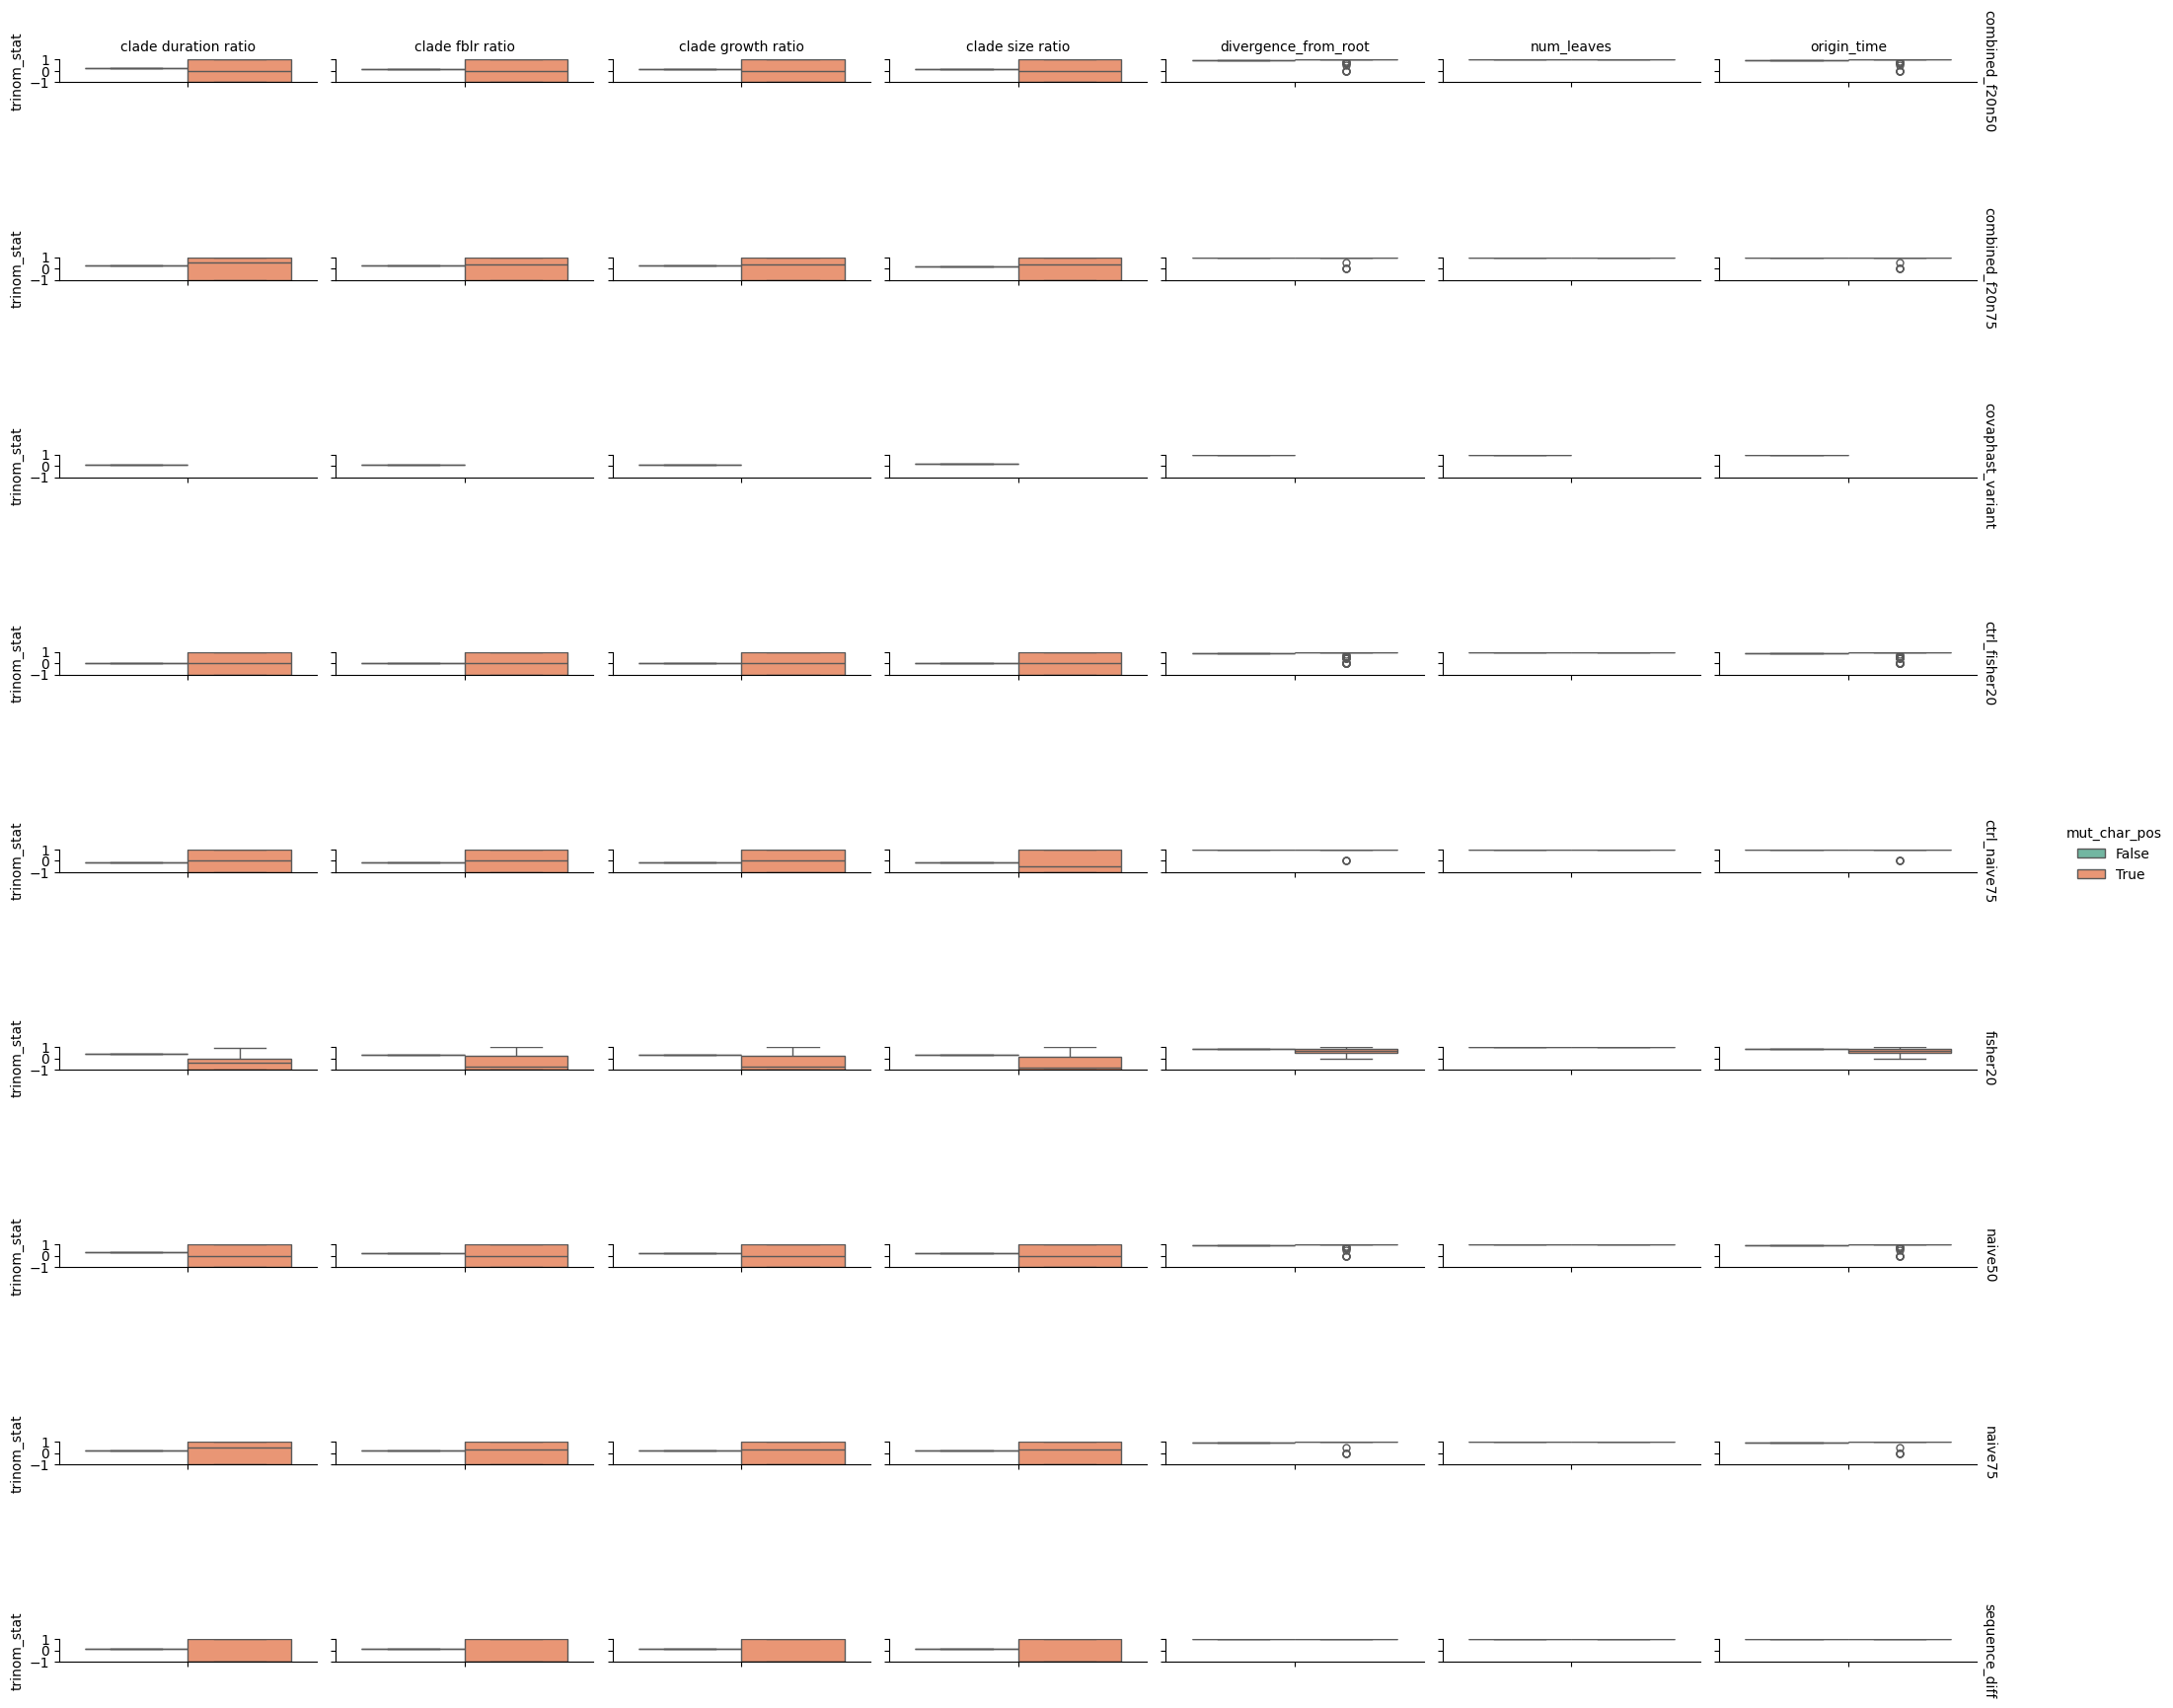

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


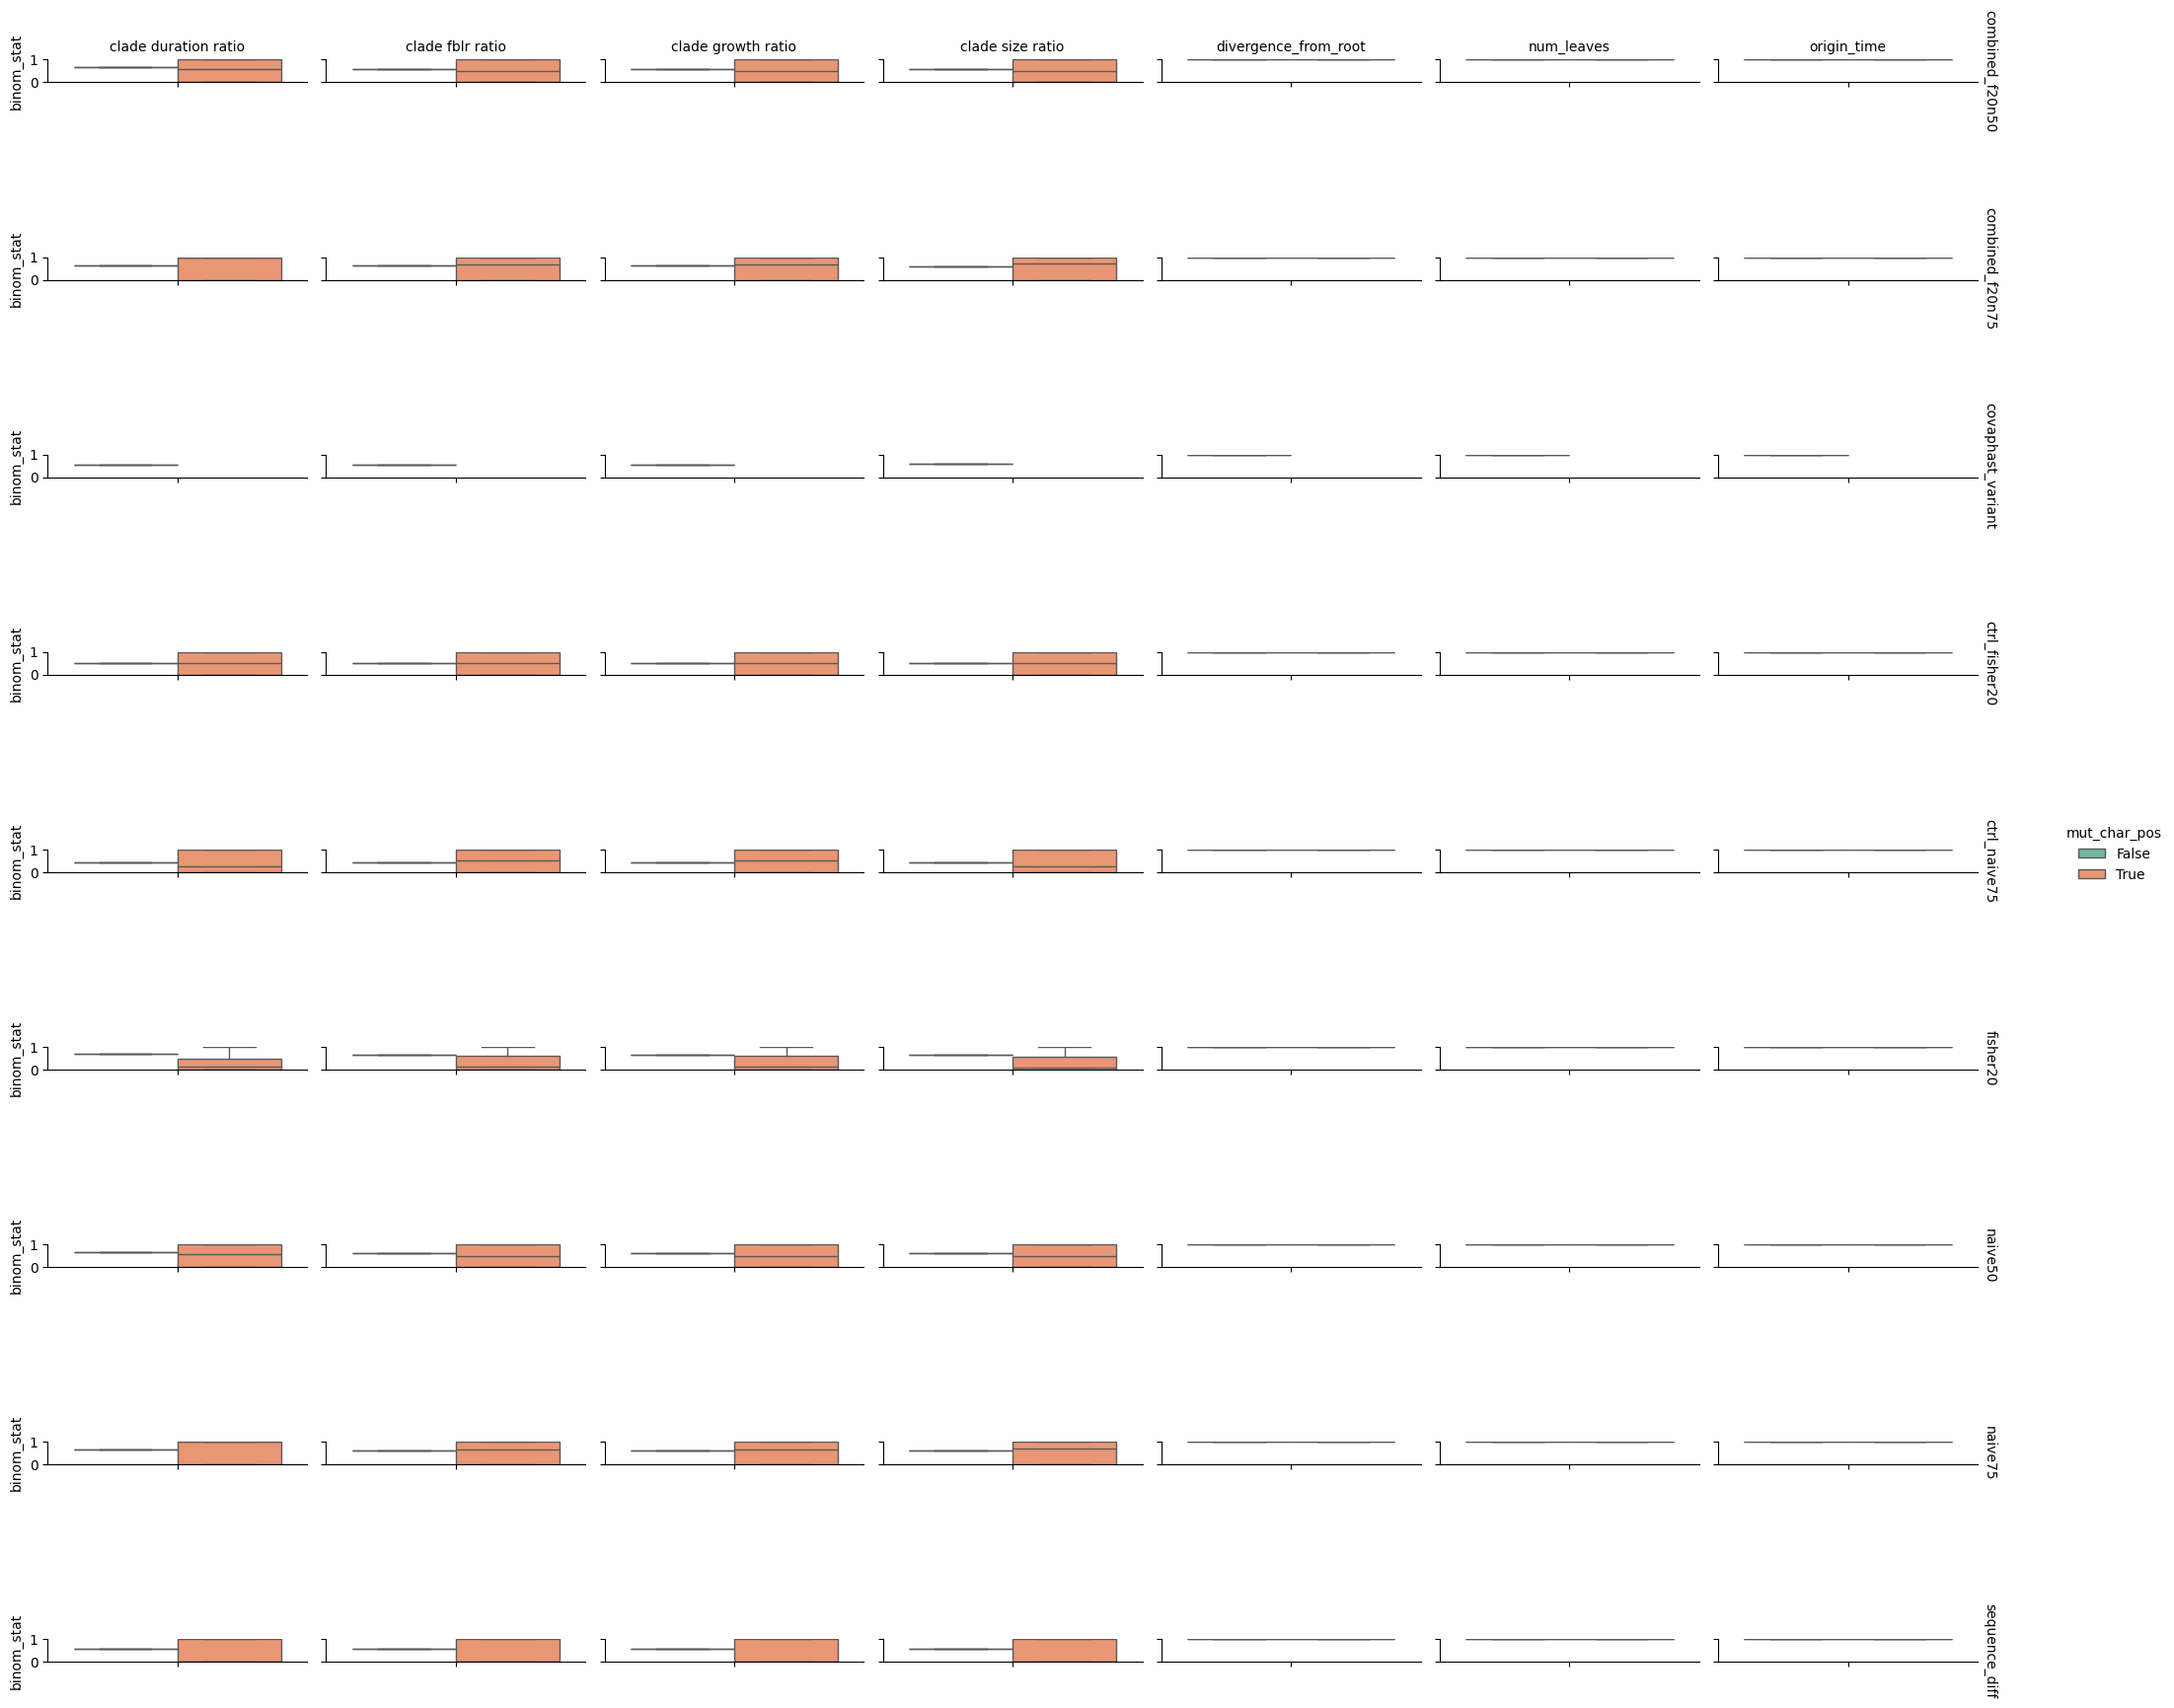

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


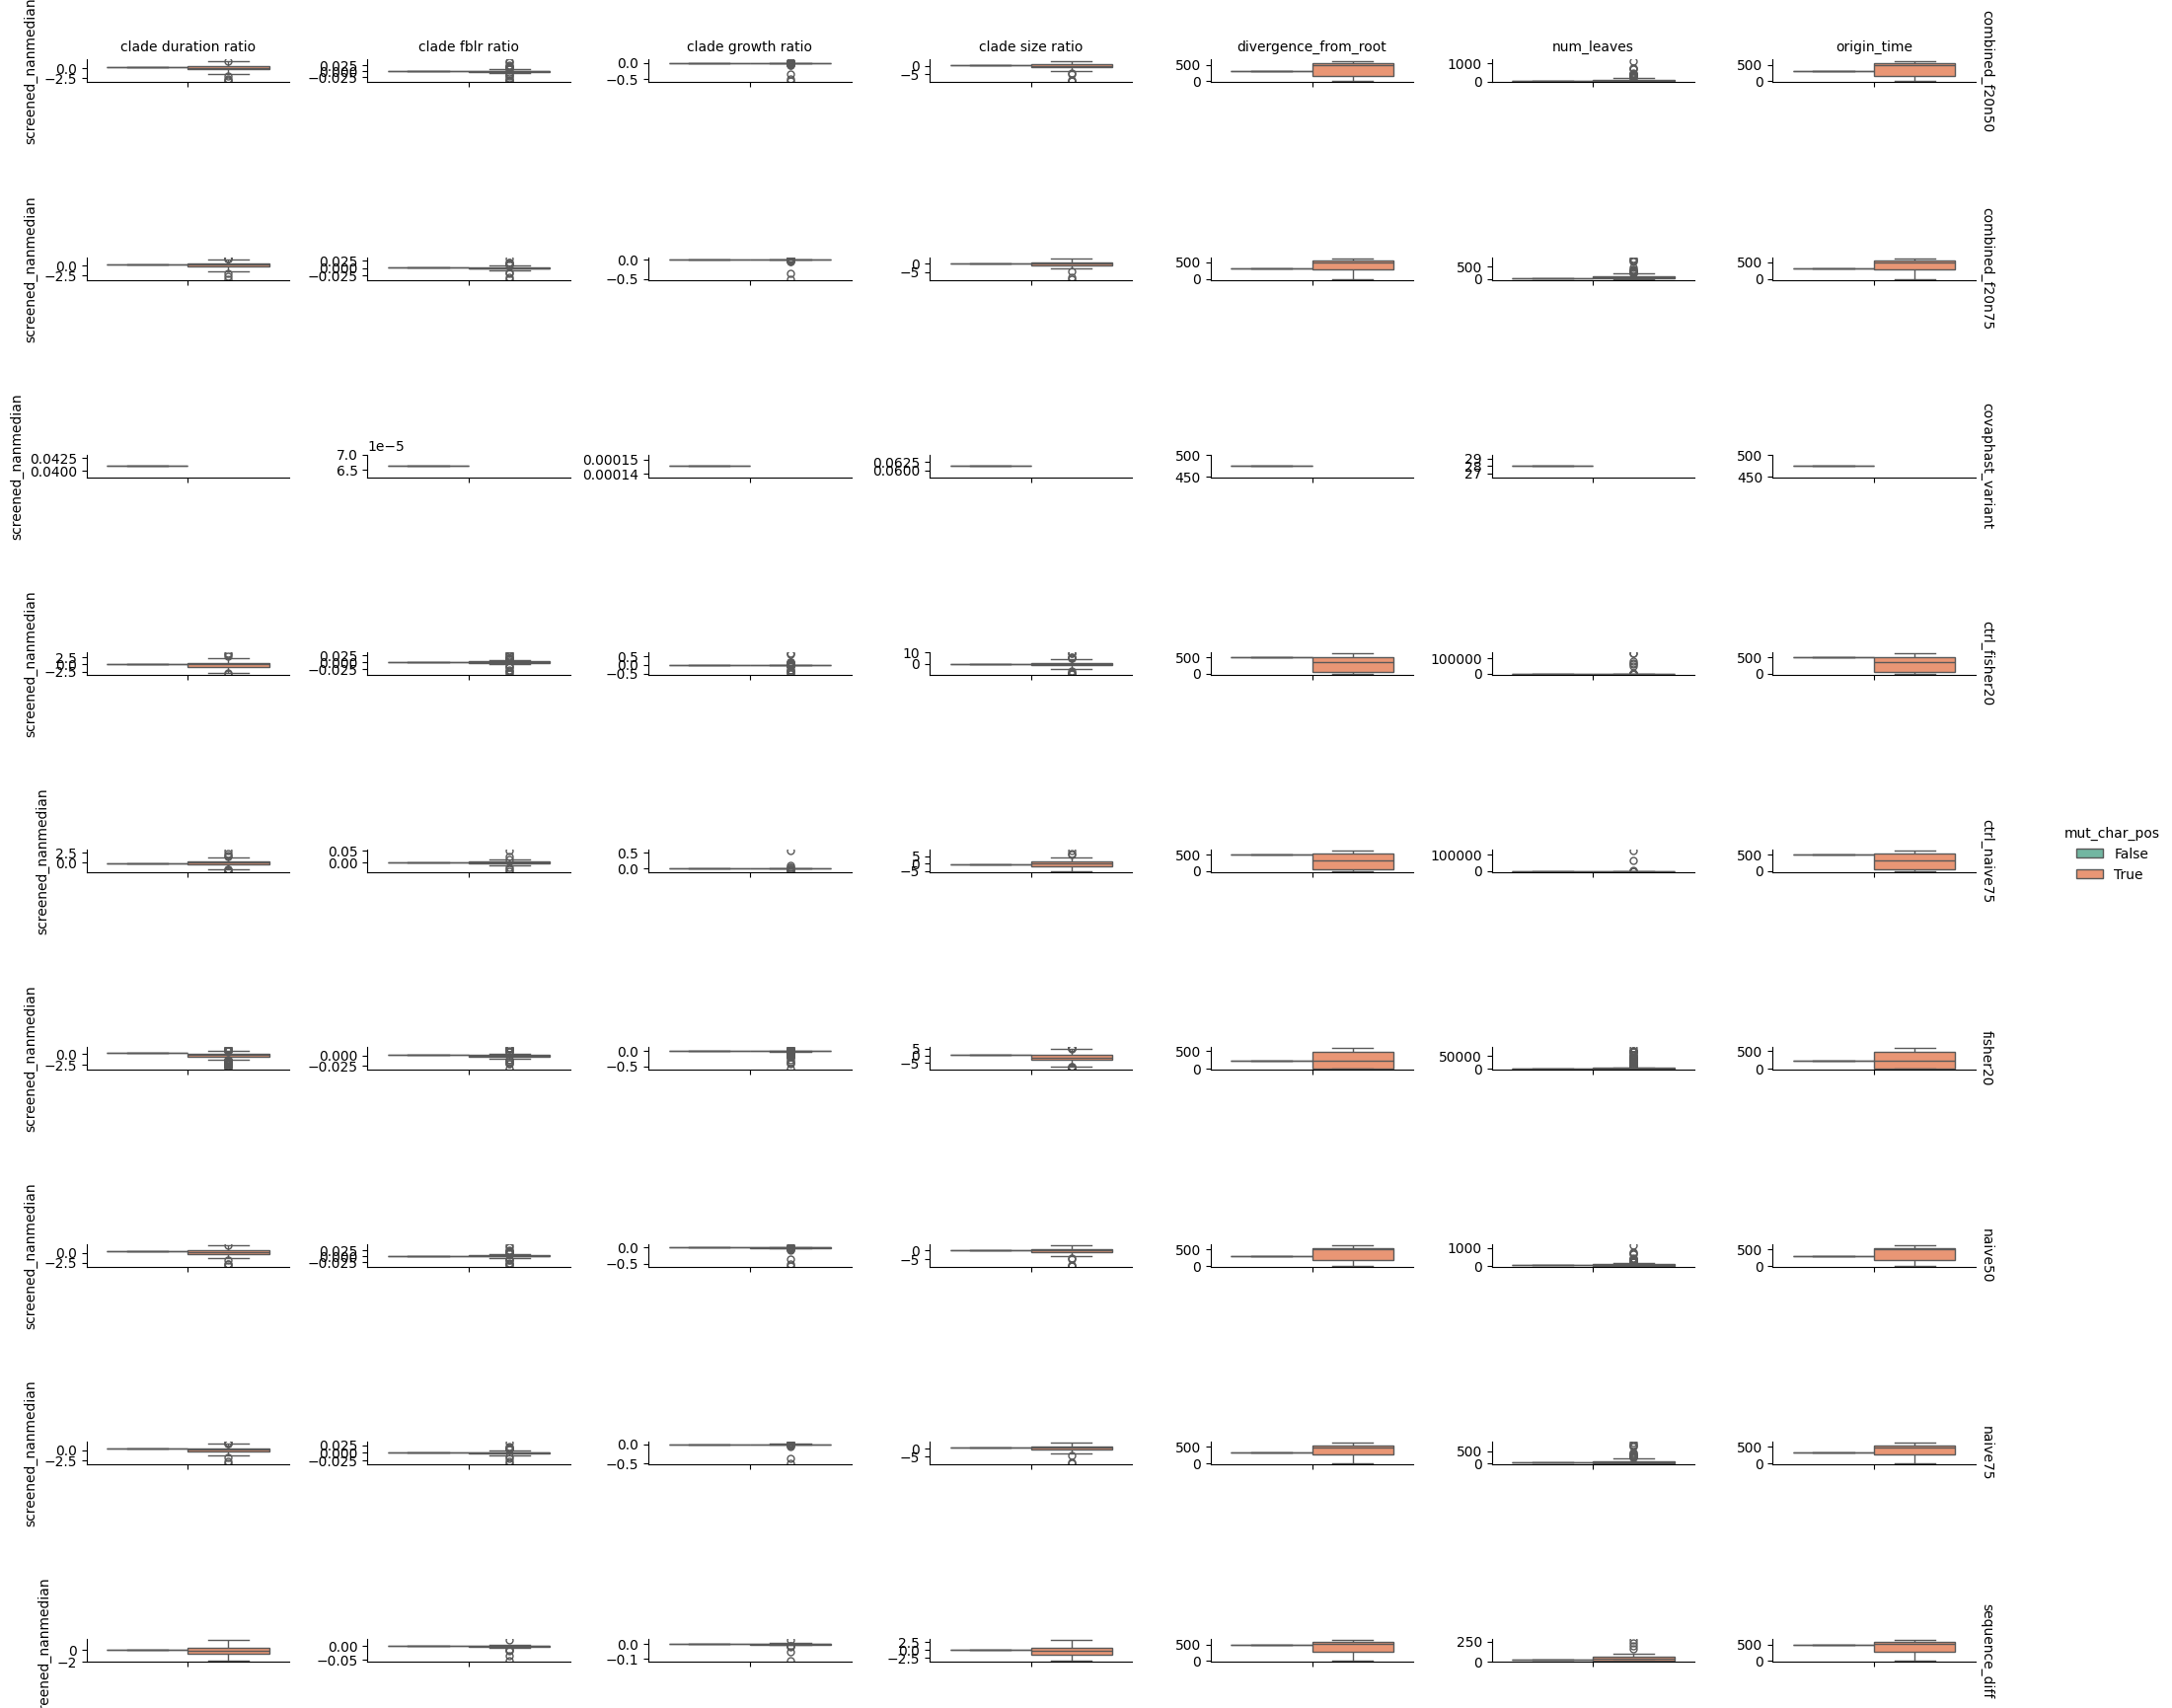

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


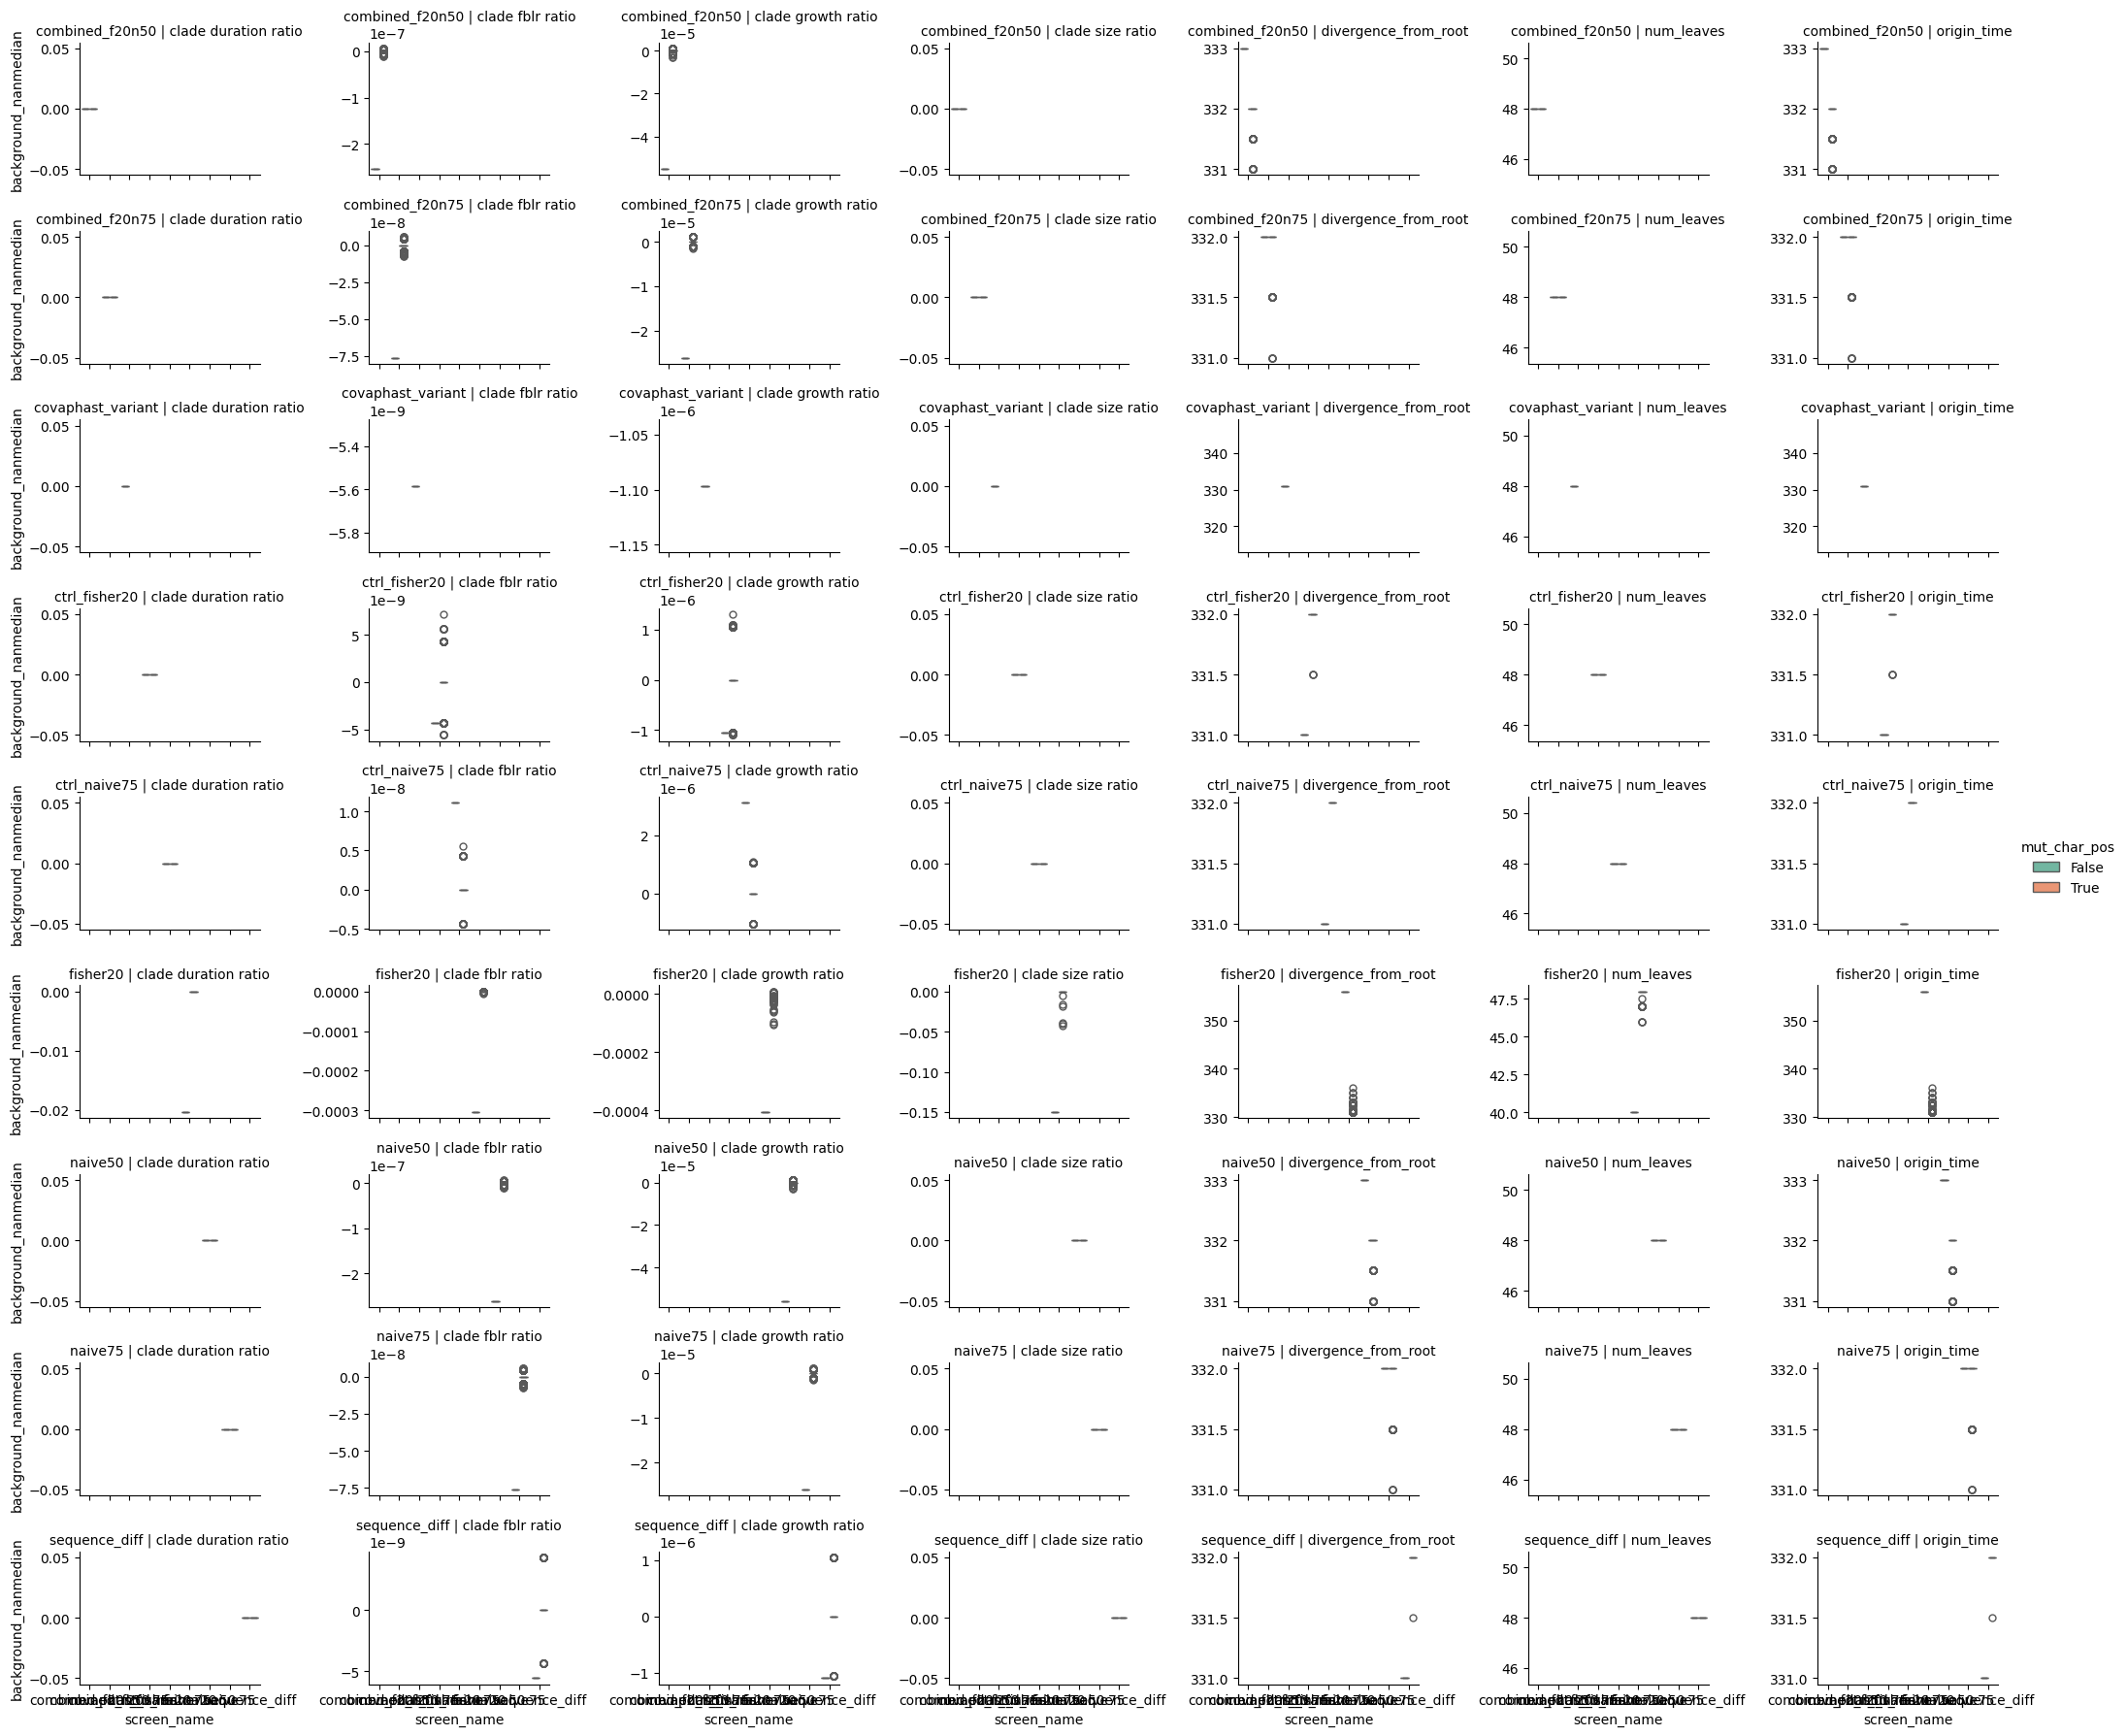

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
